In [3]:
#Importing all required library
import nltk
import re
import string
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS

In [4]:
#Downloading nltk StopWords and Wordnet 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Dataset 1

In [5]:
d1 = pd.read_csv("news.csv")

In [6]:
d1.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

In [7]:
d1["Article"] = d1["title"] + d1["text"]
d1.sample(frac = 1) #Shuffle 100%

d1.label[d1.label == 'REAL'] = 1
d1.label[d1.label == 'FAKE'] = 0

d1 = d1.loc[:,['Article','label']]
d1 = d1.dropna()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [8]:
d1.head()

Article label
0  You Can Smell Hillary’s FearDaniel Greenfield,...     0
1  Watch The Exact Moment Paul Ryan Committed Pol...     0
2  Kerry to go to Paris in gesture of sympathyU.S...     1
3  Bernie supporters on Twitter erupt in anger ag...     0
4  The Battle of New York: Why This Primary Matte...     1

In [9]:
def wordpre(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [10]:
d1['Article']=d1['Article'].apply(wordpre)

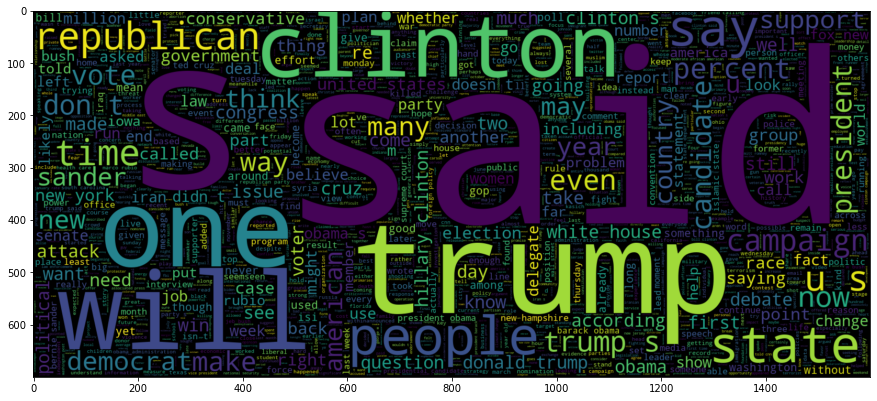

In [14]:
#word used in Real news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(d1[d1.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

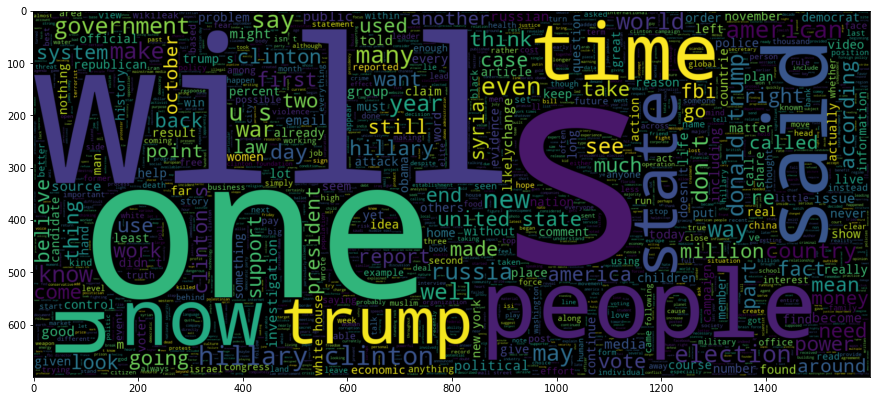

In [15]:
#word used in Fake news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(d1[d1.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset2

In [11]:
dF2 = pd.read_csv("Fake.csv")
dT2 = pd.read_csv("True.csv")

In [12]:
#Counting by Subjects in Real news
for key,count in dT2.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
#Getting Total Rows
print(f"Total Records:\t{dT2.shape[0]}")

politicsNews:	11272
worldnews:	10145
Total Records:	21417


In [13]:
#Counting by Subjects in Fake news
for key,count in dF2.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
#Getting Total Rows
print(f"Total Records:\t{dF2.shape[0]}")

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
Total Records:	23481


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


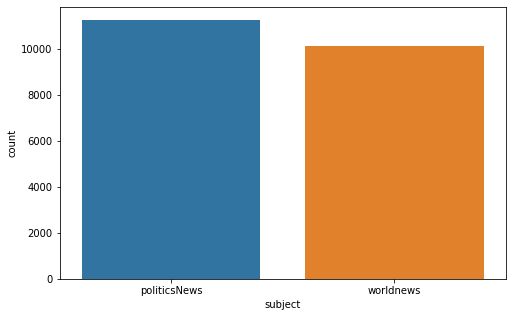

In [14]:
#ploting the Subjects in Real news
plt.figure(figsize=(8,5))
sns.countplot("subject", data=dT2)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


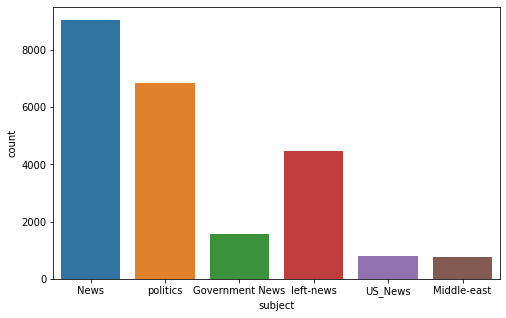

In [15]:
#ploting the Subjects in Fake news
plt.figure(figsize=(8,5))
sns.countplot("subject", data=dF2)
plt.show()

In [16]:
dT2['label']= 1
dF2['label']= 0
d2 = pd.concat([dT2, dF2])
d2["Article"] = d2["title"] + d2["text"]
d2.sample(frac = 1) #Shuffle 100%
d2 = d2.loc[:,['Article','label']]

In [17]:
d2

Article  label
0      As U.S. budget fight looms, Republicans flip t...      1
1      U.S. military to accept transgender recruits o...      1
2      Senior U.S. Republican senator: 'Let Mr. Muell...      1
3      FBI Russia probe helped by Australian diplomat...      1
4      Trump wants Postal Service to charge 'much mor...      1
...                                                  ...    ...
23476  McPain: John McCain Furious That Iran Treated ...      0
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...      0
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...      0
23479  How to Blow $700 Million: Al Jazeera America F...      0
23480  10 U.S. Navy Sailors Held by Iranian Military ...      0

[44898 rows x 2 columns]

In [18]:
##  Applying the wordpre method to the dataset
d2['Article']=d2['Article'].apply(wordpre)

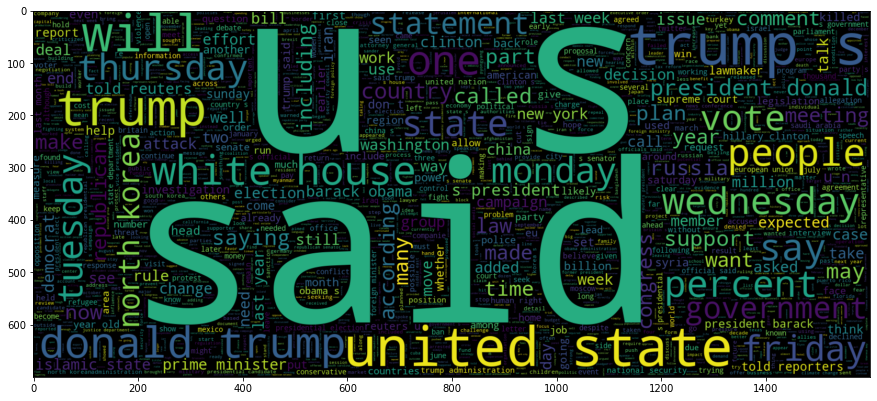

In [24]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(d2[d2.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

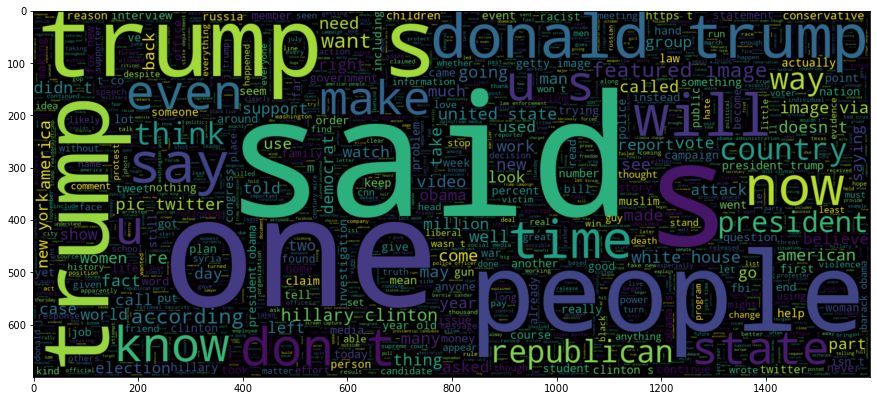

In [25]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(d2[d2.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset 3

In [19]:
dR3 = pd.read_csv("politifact_real.csv")
dF3 = pd.read_csv("politifact_fake.csv")

In [20]:
dR3['label']= 1
dF3['label']= 0
df3 = pd.concat([dR3, dF3])
df3["Article"] = df3["title"]
df3.sample(frac = 1) #Shuffle 100%
df3 = df3.loc[:,['Article','label']]

In [21]:
df3

Article  label
0          National Federation of Independent Business      1
1                          comments in Fayetteville NC      1
2    Romney makes pitch, hoping to close deal : Ele...      1
3    Democratic Leaders Say House Democrats Are Uni...      1
4      Budget of the United States Government, FY 2008      1
..                                                 ...    ...
427        Who is affected by the government shutdown?      0
428  Lindsey Graham Threatens To Convert To Democra...      0
429  ELECTORAL COLLEGE ELECTOR COMMITS SUICIDE TO A...      0
430  Sarah Palin Calls To Boycott Mall Of America B...      0
431                                  Account Suspended      0

[1056 rows x 2 columns]

In [22]:
df3['Article']=df3['Article'].apply(wordpre)

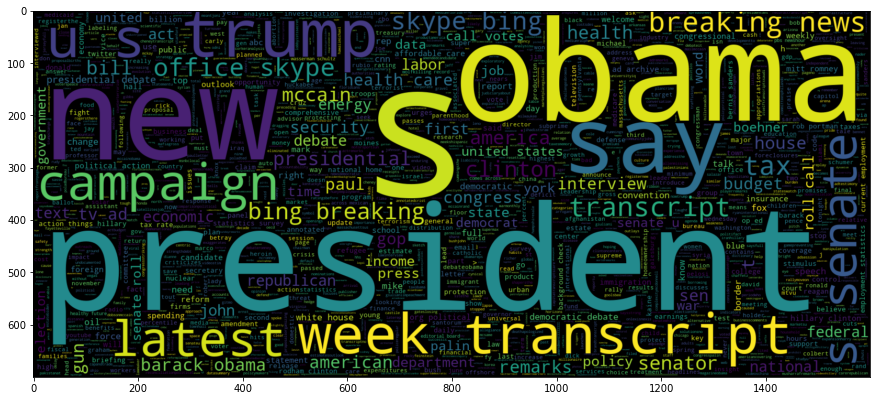

In [30]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(df3[df3.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

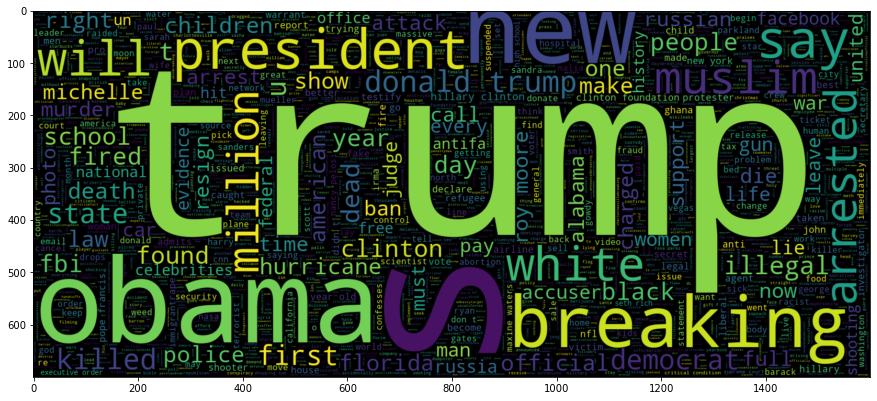

In [31]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(df3[df3.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset-4

In [23]:
df4= pd.read_csv("train.csv")

In [24]:
df4.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

In [25]:
df4["Article"] = df4["title"] + df4["text"]
df4.sample(frac = 1) #Shuffle 100%

df4 = df4.loc[:,['Article','label']]
df4 = df4.dropna()

In [26]:
df4['Article']=df4['Article'].apply(wordpre)

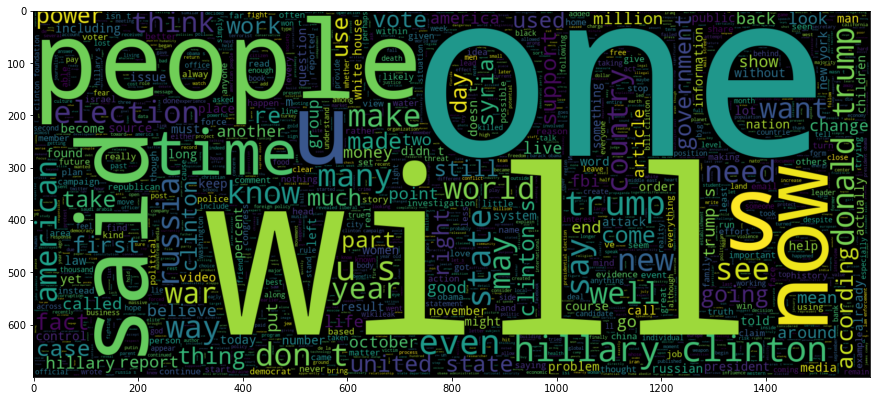

In [43]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(df4[df4.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

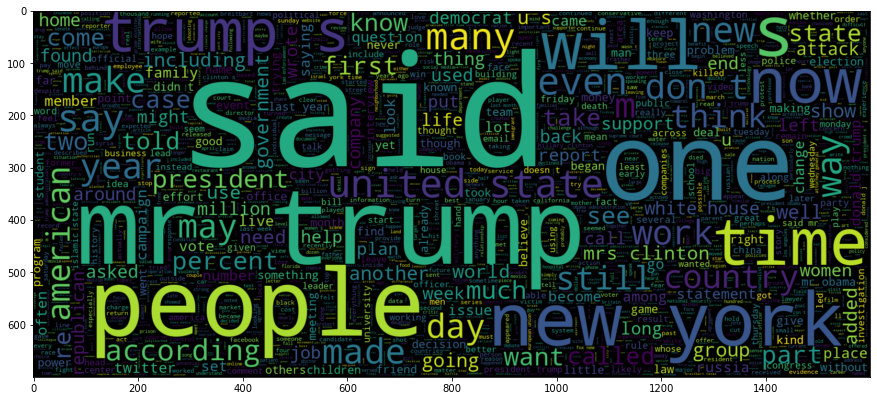

In [44]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(df4[df4.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

## Dataset -5

In [27]:
d5= pd.read_csv("data.csv")

In [28]:
d5

URLs  \
0     http://www.bbc.com/news/world-us-canada-414191...   
1     https://www.reuters.com/article/us-filmfestiva...   
2     https://www.nytimes.com/2017/10/09/us/politics...   
3     https://www.reuters.com/article/us-mexico-oil-...   
4     http://www.cnn.com/videos/cnnmoney/2017/10/08/...   
...                                                 ...   
4004  http://beforeitsnews.com/sports/2017/09/trends...   
4005  http://beforeitsnews.com/u-s-politics/2017/10/...   
4006  https://www.activistpost.com/2017/09/ron-paul-...   
4007  https://www.reuters.com/article/us-china-pharm...   
4008  http://beforeitsnews.com/u-s-politics/2017/10/...   

                                               Headline  \
0            Four ways Bob Corker skewered Donald Trump   
1     Linklater's war veteran comedy speaks to moder...   
2     Trump’s Fight With Corker Jeopardizes His Legi...   
3     Egypt's Cheiron wins tie-up with Pemex for Mex...   
4           Jason Aldean opens 'SNL' with Vegas tribute   
...                                                 ...   
4004                                    Trends to Watch   
4005  Trump Jr. Is Soon To Give A 30-Minute Speech F...   
4006        Ron Paul on Trump, Anarchism & the AltRight   
4007  China to accept overseas trial data in bid to ...   
4008  Vice President Mike Pence Leaves NFL Game Beca...   

                                                   Body  Label  
0     Image copyright Getty Images\nOn Sunday mornin...      1  
1     LONDON (Reuters) - “Last Flag Flying”, a comed...      1  
2     The feud broke into public view last week when...      1  
3     MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...      1  
4     Country singer Jason Aldean, who was performin...      1  
...                                                 ...    ...  
4004  Trends to Watch\n% of readers think this story...      0  
4005  Trump Jr. Is Soon To Give A 30-Minute Speech F...      0  
4006                                                NaN      0  
4007  SHANGHAI (Reuters) - China said it plans to ac...      1  
4008  Vice President Mike Pence Leaves NFL Game Beca...      0  

[4009 rows x 4 columns]

In [29]:
d5["Article"] = d5["Headline"] + d5["Body"]
d5["label"] = d5["Label"]
d5.sample(frac = 1) #Shuffle 100%
d5 = d5.loc[:,['Article','label']]
d5 = d5.dropna()

In [30]:
d5['Article']=d5['Article'].apply(wordpre)

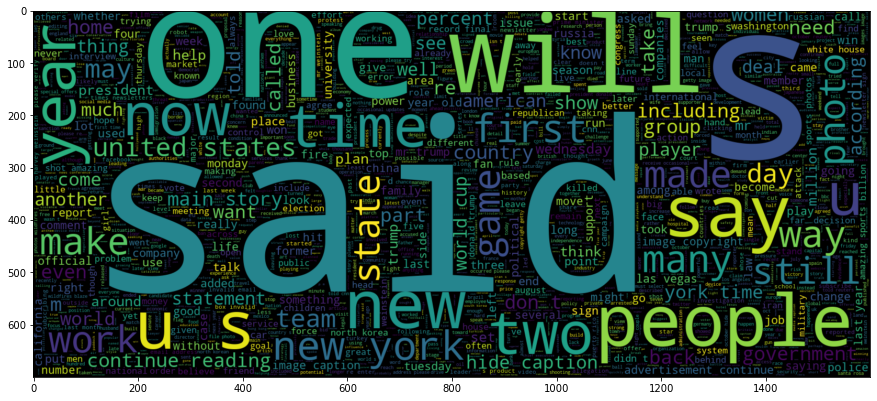

In [50]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(d5[d5.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

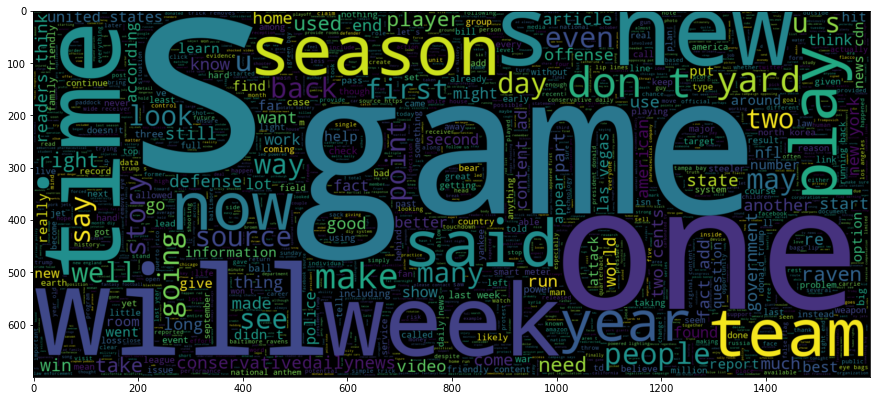

In [51]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(d5[d5.label== 00].Article))
plt.imshow(wc, interpolation="bilinear")

In [31]:
#combining all the datset into one
frames = [d1, d2, df3, df4,d5]
data = pd.concat(frames)

In [32]:
data.shape

(76480, 2)

In [34]:
data.head()

Article label
0  you can smell hillary s feardaniel greenfield ...     0
1  watch the exact moment paul ryan committed pol...     0
2  kerry to go to paris in gesture of sympathyu s...     1
3  bernie supporters on twitter erupt in anger ag...     0
4  the battle of new york  why this primary matte...     1

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

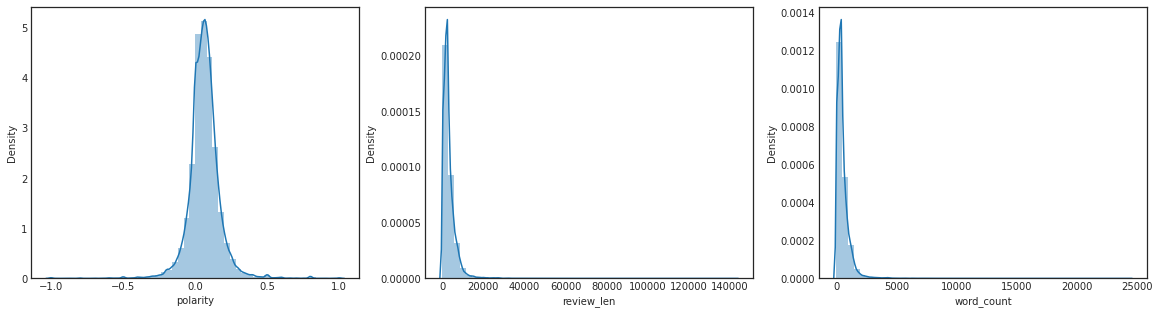

In [48]:
from textblob import TextBlob, Word, Blobber

data['polarity'] = data['Article'].map(lambda text: TextBlob(text).sentiment.polarity)
data['review_len'] = data['Article'].astype(str).apply(len)
data['word_count'] = data['Article'].apply(lambda x: len(str(x).split()))

#Plotting the distribution of the extracted feature
plt.figure(figsize = (20, 5))
plt.style.use('seaborn-white')
plt.subplot(131)
sns.distplot(data['polarity'])
fig = plt.gcf()
plt.subplot(132)
sns.distplot(data['review_len'])
fig = plt.gcf()
plt.subplot(133)
sns.distplot(data['word_count'])
fig = plt.gcf()

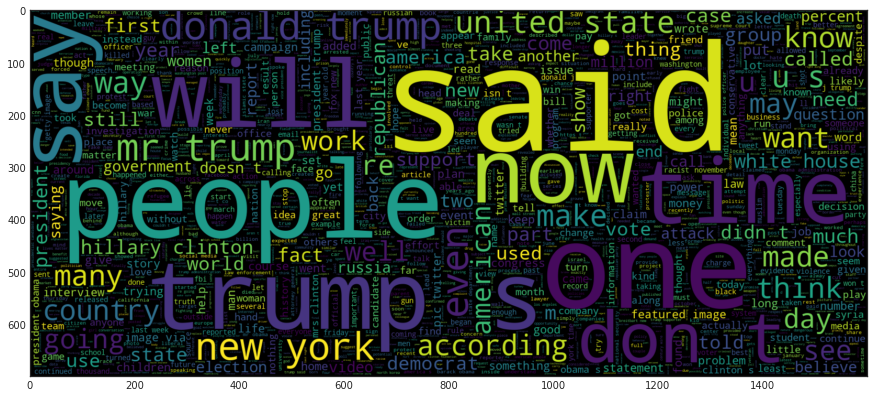

In [49]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(data[data.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

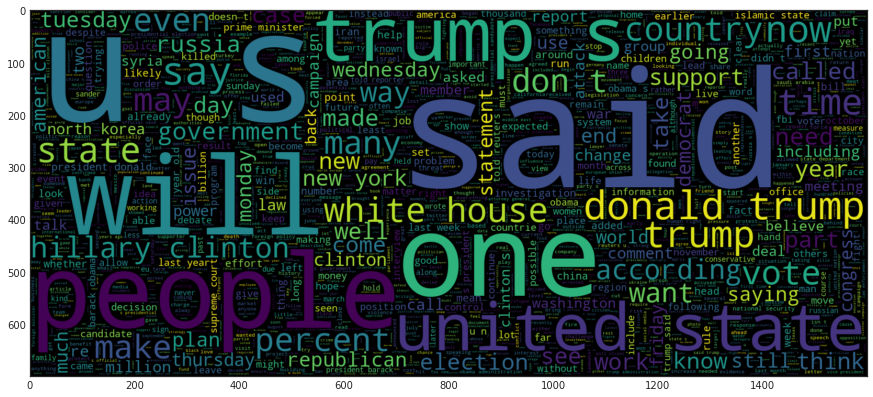

In [50]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(data[data.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

In [39]:
x_train,x_test,y_train,y_test = train_test_split(data['Article'], data['label'], test_size=0.2, random_state=2021)

In [40]:
x_train.shape

(61184,)

In [41]:
x_test.shape

(15296,)

In [42]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

## Modeling

### LogisticRegression

In [42]:
#LogisticRegression
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

Logisticmodel = pipe.fit(x_train, y_train)
prediction = Logisticmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
Logisticmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 86.58%


In [43]:
print(confusion_matrix(y_test, prediction))
print("\nCLassification Report of Logistic Regression Classifier:\n")
print(classification_report(y_test, prediction))

[[7102  807]
 [1246 6141]]

CLassification Report of Logistic Regression Classifier:

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      7909
           1       0.88      0.83      0.86      7387

    accuracy                           0.87     15296
   macro avg       0.87      0.86      0.87     15296
weighted avg       0.87      0.87      0.87     15296



### DecisionTreeClassifier

In [44]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))])
DecisionTreemodel = pipe.fit(x_train, y_train)
prediction = DecisionTreemodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
DecisionTreemodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 81.18%


In [45]:
print(confusion_matrix(y_test, prediction))
print("\nCLassification Report of DecisionTreeClassifier:\n")
print(classification_report(y_test, prediction))

[[7338  571]
 [2308 5079]]

CLassification Report of DecisionTreeClassifier:

              precision    recall  f1-score   support

           0       0.76      0.93      0.84      7909
           1       0.90      0.69      0.78      7387

    accuracy                           0.81     15296
   macro avg       0.83      0.81      0.81     15296
weighted avg       0.83      0.81      0.81     15296



### XGBoostClassifier

In [46]:
pip install xgboost

     |████████████████████████████████| 173.5 MB 19 kB/s s eta 0:00:01    |███████████▏                    | 60.4 MB 16.1 MB/s eta 0:00:08     |█████████████████████████▏      | 136.7 MB 18.0 MB/s eta 0:00:03
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [47]:
from xgboost import XGBClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=2021))])

xgboostmodel = pipe.fit(x_train, y_train)
prediction = xgboostmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
xgboostmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:00:31] WARNING: ../src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:00:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 79.94%


In [48]:
print(confusion_matrix(y_test, prediction))
print("\nCLassification Report of XGBoostClassifier:\n")
print(classification_report(y_test, prediction))

[[7799  110]
 [2959 4428]]

CLassification Report of XGBoostClassifier:

              precision    recall  f1-score   support

           0       0.72      0.99      0.84      7909
           1       0.98      0.60      0.74      7387

    accuracy                           0.80     15296
   macro avg       0.85      0.79      0.79     15296
weighted avg       0.85      0.80      0.79     15296



### Multinomial Naive Bayes Classifier

In [49]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

MNBCmodel = pipe.fit(x_train, y_train)
prediction = MNBCmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
Multinomial_Naive_Bayes_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 78.47%


In [50]:
print(confusion_matrix(y_test, prediction))
print("\nCLassification Report of Multinomial Naive Bayes Classifier:\n")
print(classification_report(y_test, prediction))

[[7038  871]
 [2422 4965]]

CLassification Report of Multinomial Naive Bayes Classifier:

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      7909
           1       0.85      0.67      0.75      7387

    accuracy                           0.78     15296
   macro avg       0.80      0.78      0.78     15296
weighted avg       0.80      0.78      0.78     15296



# LSTM 

In [51]:
from nltk.corpus import stopwords
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [52]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [53]:
stop = stopwords.words('english')
data['Article'] = data['Article'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data.head()

Article label
0  smell hillary feardaniel greenfield shillman j...     0
1  watch exact moment paul ryan committed politic...     0
2  kerry go paris gesture sympathyu secretary sta...     1
3  bernie supporters twitter erupt anger dnc trie...     0
4  battle new york primary mattersit primary day ...     1

In [54]:
news_features=data.copy()
news_features=news_features[['Article']].reset_index(drop=True)
news_features.head()

Article
0  smell hillary feardaniel greenfield shillman j...
1  watch exact moment paul ryan committed politic...
2  kerry go paris gesture sympathyu secretary sta...
3  bernie supporters twitter erupt anger dnc trie...
4  battle new york primary mattersit primary day ...

In [55]:
stop_words = set(stopwords.words("english"))
ps = PorterStemmer()

corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['Article'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news) 

In [56]:
corpus[1]

'watch exact moment paul ryan commit polit suicid trump ralli video googl pinterest digg linkedin reddit stumbleupon print delici pocket tumblr two fundament truth world paul ryan desper want presid paul ryan never presid today prove particularli stagger exampl polit cowardic paul ryan revers cours announc back trump train aboutfac week ago previous declar would support defend trump tape made public trump brag assault women suddenli ryan appear pro trump ralli boldli declar alreadi sent vote make presid unit state surreal moment figurehead republican parti dose gasolin got stage chilli afternoon wisconsin lit match speakerryan say vote realdonaldtrump republican time come home http co pic twitter com abc news polit abcpolit novemb democrat parti ask better moment film ryan chanc ever becom presid went zero instant wreckag trump leav behind wake cravenli back campaign recov ryan career manag limp way dnc tape lock load use everi ad elect day ring endors man clearli hate person level spe

In [57]:
voc_size=10000

onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [58]:
sent_length=5000

#Padding the sentences
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 7592 1194 7958]
 [   0    0    0 ... 5752 9198 4302]
 [   0    0    0 ... 6357 6564 8685]
 ...
 [   0    0    0 ... 3511 7100 4045]
 [   0    0    0 ... 4321 5054 2097]
 [   0    0    0 ... 3221 2617 8575]]


In [59]:
embedded_docs[1]

array([   0,    0,    0, ..., 5752, 9198, 4302], dtype=int32)

In [60]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(news_features['Article'])
X.shape

(76480, 5000)

In [61]:
y=data['label']

In [62]:
len(embedded_docs),y.shape

(76480, (76480,))

In [63]:
# Converting the X and y as array
X_final=np.asarray(embedded_docs).astype(np.float32)
y_final=np.asarray(y).astype(np.float32)

#Check shape of X and y final
X_final.shape,y_final.shape

((76480, 5000), (76480,))

In [64]:
#Creating the lstm model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100))) #Adding 100 lstm neurons in the layer
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5000, 40)          400000    
_________________________________________________________________
dropout (Dropout)            (None, 5000, 40)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 513,001
Trainable params: 513,001
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
# Train test split of the X and y final
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [66]:
# Fitting with 10 epochs and 64 batch size
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
801/801 [==============================] - 695s 856ms/step - loss: 0.4915 - accuracy: 0.7476 - val_loss: 0.3398 - val_accuracy: 0.8521
Epoch 2/10
801/801 [==============================] - 685s 856ms/step - loss: 0.3356 - accuracy: 0.8520 - val_loss: 0.3722 - val_accuracy: 0.8359
Epoch 3/10
801/801 [==============================] - 686s 856ms/step - loss: 0.3096 - accuracy: 0.8691 - val_loss: 0.3126 - val_accuracy: 0.8555
Epoch 4/10
801/801 [==============================] - 686s 856ms/step - loss: 0.2493 - accuracy: 0.8947 - val_loss: 0.2924 - val_accuracy: 0.8685
Epoch 5/10
801/801 [==============================] - 686s 857ms/step - loss: 0.2434 - accuracy: 0.8959 - val_loss: 0.3075 - val_accuracy: 0.8731
Epoch 6/10
801/801 [==============================] - 686s 857ms/step - loss: 0.2615 - accuracy: 0.8939 - val_loss: 0.2980 - val_accuracy: 0.8769
Epoch 7/10
801/801 [==============================] - 687s 858ms/step - loss: 0.2822 - accuracy: 0.8811 - val_loss: 0.3147 -

In [67]:
# Predicting from test data
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
LSTM = round(accuracy_score(y_test, y_pred)*100,2)

In [73]:
print(confusion_matrix(y_test, y_pred))
#Calculating Accuracy score
accuracy_score(y_test,y_pred)
print("\nCLassification Report of Multinomial Naive Bayes Classifier:\n")
print(classification_report(y_test, y_pred))

[[11804  1412]
 [ 1373 10650]]

CLassification Report of Multinomial Naive Bayes Classifier:

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89     13216
         1.0       0.88      0.89      0.88     12023

    accuracy                           0.89     25239
   macro avg       0.89      0.89      0.89     25239
weighted avg       0.89      0.89      0.89     25239



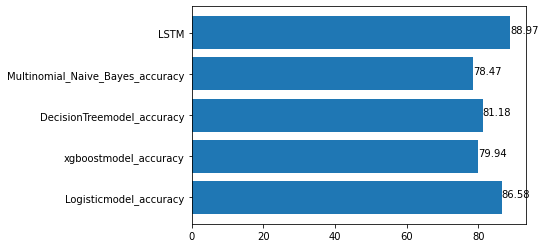

In [69]:
x = [ "Logisticmodel_accuracy",  "xgboostmodel_accuracy" , 
     "DecisionTreemodel_accuracy","Multinomial_Naive_Bayes_accuracy",
     "LSTM"]
y =  [Logisticmodel_accuracy,xgboostmodel_accuracy,
      DecisionTreemodel_accuracy,Multinomial_Naive_Bayes_accuracy,
      LSTM]
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index, str(value))

In [70]:
model.save('LSTM_model')

INFO:tensorflow:Assets written to: LSTM_model/assets


INFO:tensorflow:Assets written to: LSTM_model/assets


## Hypothesis Testing

In [46]:
from mlxtend.evaluate import paired_ttest_5x2cv
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=Logesticmodel, 
                          estimator2=model, 
                          X=X_train, 
                          y=y_train, 
                          scoring='accuracy',
                          random_seed=1)
# summarize
print(f'The P-value is = {p:.3f}')
print(f'The t-statistics is = {t:.3f}')
# interpret the result
if p <= 0.05:
    print('Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.')
else:
    print('Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.')

The P-value is = 0.470
The t-statistics is = -0.782
Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.
